Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [1]:
NAME = "Anjana Tissera"
ID = "123459"

---

# Lab 10: Unsupervised Learning with $k$-means and PCA

In this lab, we begin our survey of common unsupervised learning methods such as k-means and PCA.

## Supervised vs. Unsupervised Learning

As we know, in the supervised setting, we are presented with a set of training pairs $(\mathbf{x}^{(i)},y^{(i)}), \mathbf{x}^{(i)} \in {\cal X}, y^{(i)} \in {\cal Y},
i \in 1..m$,
where typically ${\cal X} = \mathbb{R}^n$ and either ${\cal Y} = \mathbb{R}$ (regression) or ${\cal Y} = \{ 1, \ldots, k \}$ (classification). The goal is, given a new
$\mathbf{x} \in {\cal X}$ to come up with the best possible prediction $\hat{y} \in {\cal Y}$ corresponding to $\mathbf{x}$ or a set of predicted probabilities
$p(y=y_i \mid \mathbf{x}), i \in \{1, \ldots, k\}$.

In the *unsupervised setting*, we are presented with a set of training items $\mathbf{x}^{(i)} \in {\cal X}$ without any labels or targets. The goal is generally to
understand, given a new $\mathbf{x} \in {\cal X}$, the relationship of $\mathbf{x}$ with the training examples $\mathbf{x}^{(i)}$.

The phrase *understand the relationship* can mean many different things depending on the problem setting. Among the most common specific goals is *clustering*, in which
we map the training data to $K$ *clusters*, then, given $\mathbf{x}$, find the most similar cluster $c \in \{1,\ldots,K\}$.

## $k$-means Clustering

Clustering is the most common unsupervised learning problem, and $k$-means is the most frequently used clustering algorithm. $k$-means is suitable when 
${\cal X} = \mathbb{R}^n$ and Euclidean distance is a reasonable model of dissimilarity between items in ${\cal X}$.

The algorithm is very simple:
1. Randomly initialize $k$ cluster centroids $\mu_1, \ldots, \mu_k \in \mathbb{R}^n$.
2. Repeat until convergence:
  1. For $i \in 1..m, c^{(i)} \leftarrow \text{argmin}_j \| \mathbf{x}^{(i)} - \mu_j \|^2.$
  2. For $j \in 1..k,$
     $$ \mu_j \leftarrow \frac{\sum_{i=1}^m \delta(c^{(i)} = j)\mathbf{x}^{(i)}}{\sum_{i=1}^m \delta(c^{(i)}=j)}$$

## In-Lab Exercise

Write Python code to generate 100 examples from each of three different well-separated 2D Gaussian distributions. Plot the data, initialize three arbitrary means,
and animate the process of iterative cluster assignment and cluster mean assignment.


<details>
    <summary><font size="3" color="green"><b>Hint:</b></font></summary>
    there's a naive implementation of the algorithm in this notebook below. You can use it or make your own implementation.
</details>

### Exercise 1.1 (5 points)

Generate 100 examples from each of **three different well-separated 2D Gaussian distributions**.

<details>
    <summary><font size="3" color="green"><b>Hint:</b></font></summary>
    You can use <a href="https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html">make_blobs</a> function from sklearn for create dataset. Or you can make them yourself. :)
</details>

In [2]:
from sklearn.datasets import make_blobs

X=None
y=None

# YOUR CODE HERE
X, y = make_blobs(n_samples=300, centers=3, n_features=2, random_state=999)

In [3]:
import numpy as np
print('X.shape', X.shape)
print('y.shape', y.shape)
print('X=\n', X[:5])
print('y=\n', y[:5])

print(y.min(), y.max())
print(len(np.unique(y)))

# Test function: Do not remove
assert X.shape == (300, 2), 'Size of X is incorrect'
assert y.shape == (300,) or y.shape == 300 or y.shape == (300,1), 'Size of y is incorrect'
assert len(np.unique(y)) == 3, 'Number groups of samples are incorrect'
for i in np.unique(y):
    assert isinstance(i, np.int64) or isinstance(i, int), 'group type is incorrect'

print("success!")
# End Test function

X.shape (300, 2)
y.shape (300,)
X=
 [[-8.14283462  3.02948798]
 [-5.83261924 -4.0687464 ]
 [-7.58941915  2.1909837 ]
 [-6.34013245 -3.61229524]
 [-7.26915441 -5.04055323]]
y=
 [1 2 1 2 2]
0 2
3
success!


### Exercise 1.2 (5 points)

Plot the data. Separate the data by color.

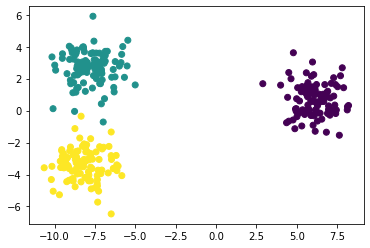

In [4]:
import matplotlib.pyplot as plt

# YOUR CODE HERE
plt.scatter(X[:, 0], X[:, 1], c=y)

**Expect result**:

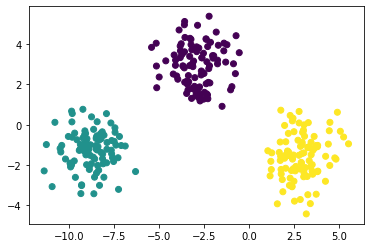

### Exercise 1.3 (20 points)

Initialize three arbitrary means, and animate the process of iterative cluster assignment and cluster mean assignment.

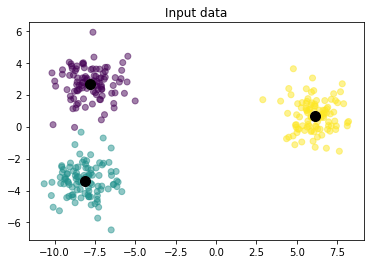

In [5]:
import numpy as np
from IPython.display import clear_output
import time

# 1. initialize 3 random centers
centers = None
m = X.shape[0]
k=3
indexes = np.arange(m)
np.random.shuffle(indexes)
centers = X[indexes[0:k],:]


error = 9999999999.0
C = np.zeros(m, dtype=int)
prev_dist = 0
while True:
    # 2. find the nearest centers for each of the points    
    dist = 0
    for i in range(m):
        C[i] = np.argmin(np.linalg.norm(X[i,:] - centers, axis=1))
        dist = dist + np.linalg.norm(X[i,:] - centers[C[i], :])**2
    
    # 3. plot the graph. Do not forget to use clear_output
    plt.scatter(X[:, 0], X[:, 1], c=C, alpha=0.5)
    plt.scatter(centers[:,0], centers[:,1], c='black', s=100)
    plt.title('Input data')
    clear_output(wait=True)
    plt.show()
    
    # 4. find the mean of each centers
    for j in range(k):
        centers[j,:] = np.mean(X[C==j], axis=0)
    
    # 5. calculate sum square error to check error. If the error is less than 1e-6, you can stop the loop.
    if prev_dist > 0:
        error = prev_dist - dist
    else:
        error = dist

    prev_dist = dist
    
    if error < 1e-6:
        break
    
    time.sleep(0.3)

# YOUR CODE HERE
# NOTE: Implemented above

In [6]:
print(centers)

# Test function: Do not remove
assert centers.shape == (2, 3) or centers.shape == (3, 2), 'Size of centers is incorrect'

print("success!")
# End Test function

[[-7.78339441  2.69680289]
 [-8.14081438 -3.37428914]
 [ 6.10235602  0.6701271 ]]
success!


**Expect result**:

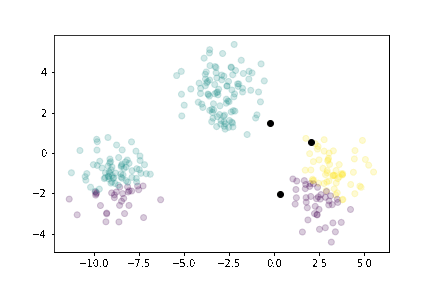

## Example with Kaggle Customer Segmentation Data

This example is based on the [Kaggle Mall Customers Dataset](https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python) and [Caner Dabakoglu's](https://www.kaggle.com/cdabakoglu) tutorial on the dataset. The goal is customer segmentation.

The dataset has 5 columns, `CustomerID`, `Gender`, `Age`, `Annual Income`, and `Spending score`.
We will use three of these variables, namely `Age`, `Annual Income`, and `Spending score` for segmenting customers.
(Give some thought to why we don't use `CustomerID` or `Gender`.)

First, let's import some libraries:

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

Next we read the data set and print out some information about it.

In [9]:
df = pd.read_csv("Mall_Customers.csv")

print('Dataset information:\n')
df.info()
print('\nDataset head (first five rows):\n')
df.head()

Dataset information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB

Dataset head (first five rows):



,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Let's drop the `CustomerID` column, as it's not useful.

In [10]:
df.drop(["CustomerID"], axis = 1, inplace=True)

Next, let's visualize the marginal distribution over each variable, to get an idea of how cohesive they are. We can see that the variables are not
quite Gaussian and have some skew:

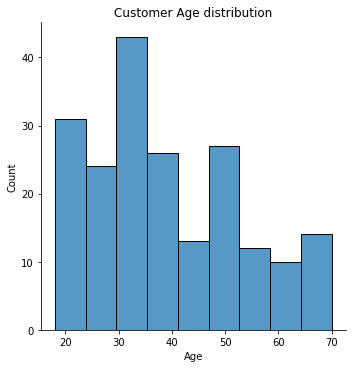

In [11]:
sns.displot(df.Age)
_ = plt.title('Customer Age distribution')

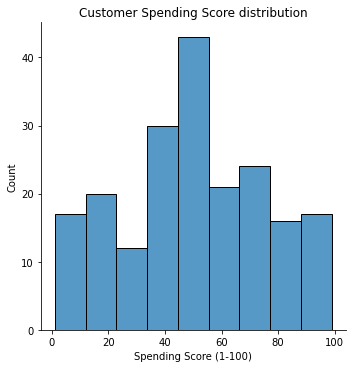

In [13]:
sns.displot(df['Spending Score (1-100)'])
_ = plt.title('Customer Spending Score distribution')

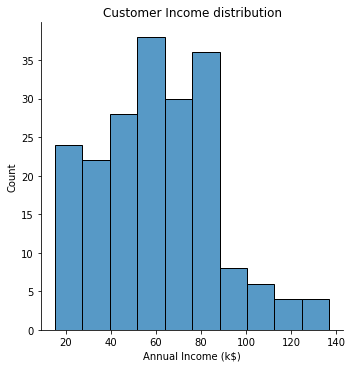

In [14]:
sns.displot(df['Annual Income (k$)'])
_ = plt.title('Customer Income distribution')

Next, let's make a 3D scatter plot of the relevant variables:

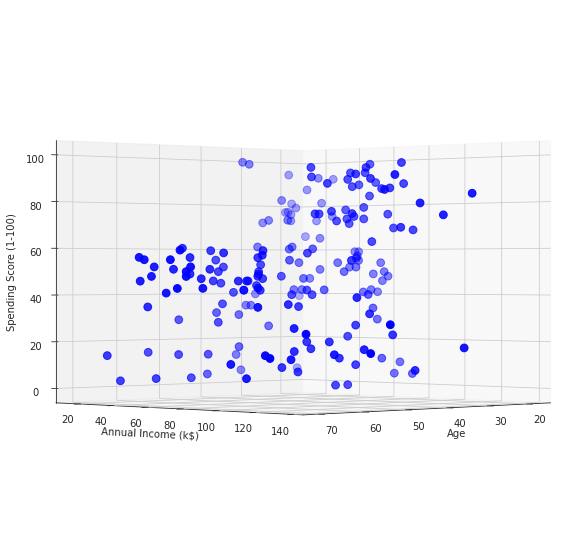

In [15]:
sns.set_style("white")
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df.Age, df["Annual Income (k$)"], df["Spending Score (1-100)"], c='blue', s=60)
ax.view_init(0, 45)
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel('Spending Score (1-100)')
plt.show()

Next, let's implement $k$-means:

In [16]:
# Initialize a k-means model given a dataset

def init_kmeans(X, k):
    m = X.shape[0]
    n = X.shape[1]
    means = np.zeros((k,n))
    order = np.random.permutation(m)[:k]
    for i in range(k):
        means[i,:] = X[order[i],:]
    return means

# Run one iteration of k-means

def iterate_kmeans(X, means):
    m = X.shape[0]
    n = X.shape[1]
    k = means.shape[0]
    distortion = np.zeros(m)
    c = np.zeros(m)
    for i in range(m):
        min_j = 0
        min_dist = 0
        for j in range(k):
            dist_j = np.linalg.norm(X[i,:] - means[j,:])
            if dist_j < min_dist or j == 0:
                min_dist = dist_j
                min_j = j
        distortion[i] = min_dist
        c[i] = min_j
    for j in range(k):
        means[j,:] = np.zeros((1,n))
        nj = 0
        for i in range(m):
            if c[i] == j:
                nj = nj + 1
                means[j,:] = means[j,:] + X[i,:]
        if nj > 0:
            means[j,:] = means[j,:] / nj
    return means, c, np.sum(distortion)

Let's build models with $k \in 1..20$, plot the distortion for each $k$, and try to choose a good value for $k$ using the so-called "elbow method."

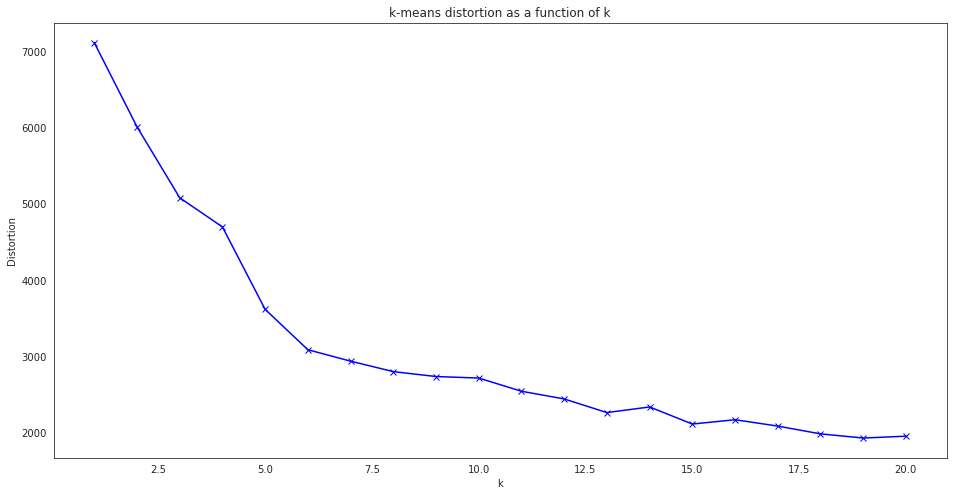

In [17]:
# Convert dataframe to matrix

X = np.array(df.iloc[:,1:])

# Intialize hyperparameters

max_k = 20
epsilon = 0.001

# For each value of k, do one run and record the resulting cost (Euclidean distortion)

distortions = np.zeros(max_k)
for k in range(1, max_k + 1):
    means = init_kmeans(X, k)
    prev_distortion = 0
    while True:
        means, c, distortion = iterate_kmeans(X, means)
        if prev_distortion > 0 and prev_distortion - distortion < epsilon:
            break
        prev_distortion = distortion
    distortions[k-1] = distortion

# Plot distortion as function of k

plt.figure(figsize=(16,8))
plt.plot(range(1,max_k+1), distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('k-means distortion as a function of k')
plt.show()

Read about the so-called "elbow method" in [Wikipedia](https://en.wikipedia.org/wiki/Elbow_method_(clustering)). Note what it says,
that "In practice there may not be a sharp elbow, and as a heuristic method, such an 'elbow' cannot always be unambiguously identified." 

Do you see a unique elbow in the distortion plot above?

Note that the results are somewhat noisy, being dependent on initial conditions.

Here's a visualization of the results for three clusters:

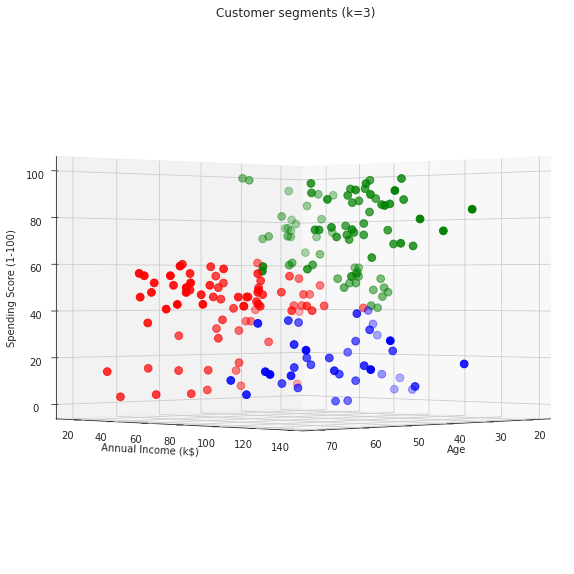

In [27]:
# Re-run k-means with k=3

k = 3
means = init_kmeans(X, k)
prev_distortion = 0
while True:
    means, c, distortion = iterate_kmeans(X, means)
    if prev_distortion > 0 and prev_distortion - distortion < epsilon:
        break
    prev_distortion = distortion
    
# Set labels in dataset to cluster IDs according to k-means model.

df["label"] = c

# Plot the data

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df.Age[df.label == 0], df["Annual Income (k$)"][df.label == 0], df["Spending Score (1-100)"][df.label == 0], c='blue', s=60)
ax.scatter(df.Age[df.label == 1], df["Annual Income (k$)"][df.label == 1], df["Spending Score (1-100)"][df.label == 1], c='red', s=60)
ax.scatter(df.Age[df.label == 2], df["Annual Income (k$)"][df.label == 2], df["Spending Score (1-100)"][df.label == 2], c='green', s=60)

# For 5 clusters, you can uncomment the following two lines.

#ax.scatter(df.Age[df.label == 3], df["Annual Income (k$)"][df.label == 3], df["Spending Score (1-100)"][df.label == 3], c='orange', s=60)
#ax.scatter(df.Age[df.label == 4], df["Annual Income (k$)"][df.label == 4], df["Spending Score (1-100)"][df.label == 4], c='purple', s=60)

ax.view_init(0, 45)
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel('Spending Score (1-100)')
plt.title('Customer segments (k=3)')
plt.show()

## In-Lab Exercise 2

1. Consider the three cluster centers above. Look at the three means closely and come up with English descriptions of each cluster from a business point of view. Label the clusters in the visualization accordingly.
2. Note that the distortion plot is quite noisy due to random initial conditions. Modify the optimization to perfrom, for each $k$, several different runs, and take the minimum distortion over those runs. Re-plot the distortion plot and see if an "elbow" is more prominent.


### Exercise 2.1 (10 points)

Consider the three cluster centers above. Look at the three means closely and come up with English descriptions of each cluster from a business point of view. Label the clusters in the visualization accordingly.

In [28]:
# YOUR CODE HERE
print("=====Cluster 1=====")
print(df[df.label == 0].mean())
print("\n")

print("=====Cluster 2=====")
print(df[df.label == 1].mean())
print("\n")

print("=====Cluster 3=====")
print(df[df.label == 2].mean())
print("\n")

=====Cluster 1=====
Age                       40.394737
Annual Income (k$)        87.000000
Spending Score (1-100)    18.631579
label                      0.000000
dtype: float64


=====Cluster 2=====
Age                       48.923077
Annual Income (k$)        44.923077
Spending Score (1-100)    40.448718
label                      1.000000
dtype: float64


=====Cluster 3=====
Age                       28.797619
Annual Income (k$)        63.119048
Spending Score (1-100)    73.535714
label                      2.000000
dtype: float64




### English descriptions of each cluster

- Cluster 1 - Middle age customers with high income and low spending score
- Cluster 2 - Middle age customers with average income and average spending score
- Cluster 3 - Young customers high income and high spending score

### Labeling the clusters on the 3-D plot

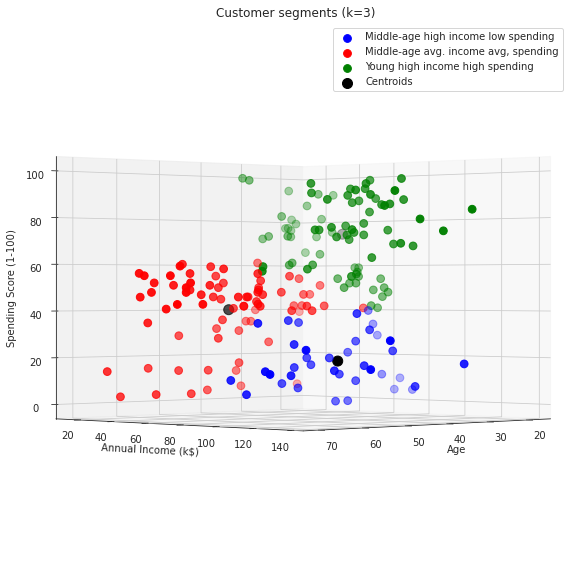

In [29]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df.Age[df.label == 0], df["Annual Income (k$)"][df.label == 0], df["Spending Score (1-100)"][df.label == 0], c='blue', s=60, label="Middle-age high income low spending")
ax.scatter(df.Age[df.label == 1], df["Annual Income (k$)"][df.label == 1], df["Spending Score (1-100)"][df.label == 1], c='red', s=60, label="Middle-age avg. income avg, spending")
ax.scatter(df.Age[df.label == 2], df["Annual Income (k$)"][df.label == 2], df["Spending Score (1-100)"][df.label == 2], c='green', s=60, label="Young high income high spending")
ax.scatter(means[:, 0], means[:, 1], means[:, 2], s = 100, c = 'black', label = 'Centroids')

ax.view_init(0, 45)
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel('Spending Score (1-100)')
plt.title('Customer segments (k=3)')
plt.legend(loc="upper right")
plt.show()

### Exercise 2.2 (20 points)

Note that the distortion plot is quite noisy due to random initial conditions. Modify the optimization to perfrom, for each $k$, several different runs, and take the minimum distortion over those runs. Re-plot the distortion plot and see if an "elbow" is more prominent.

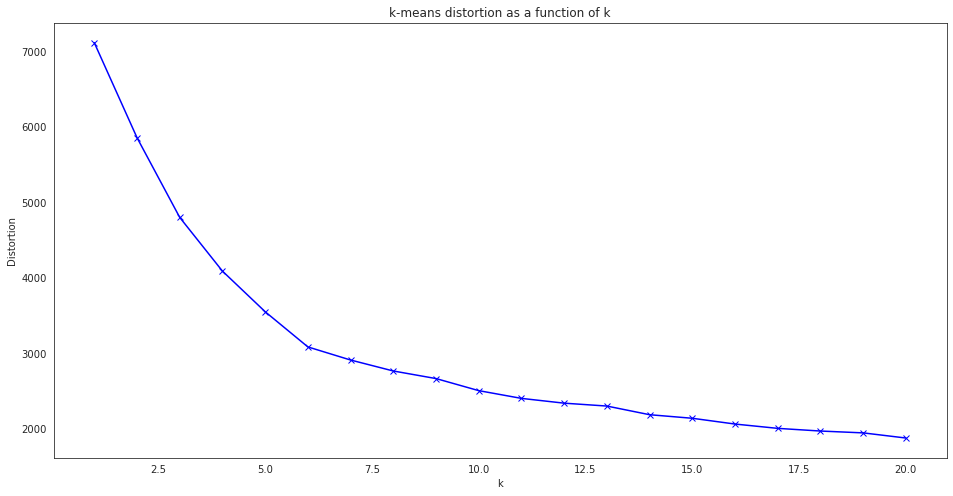

In [31]:
# YOUR CODE HERE
# Convert dataframe to matrix

X = np.array(df.iloc[:,1:])

# Intialize hyperparameters

max_k = 20
epsilon = 0.001
num_epochs = 10

# For each value of k, do num_epochs runs and record the minimum distortion for each k

distortions = np.zeros(max_k)
for k in range(1, max_k + 1):
    for i in range(num_epochs):
        means = init_kmeans(X, k)
        prev_distortion = 0
        while True:
            means, c, distortion = iterate_kmeans(X, means)
            if prev_distortion > 0 and prev_distortion - distortion < epsilon:
                break
            prev_distortion = distortion
        if i == 0:
            distortions[k-1] = distortion
        else:
            if distortion < distortions[k-1]:
                distortions[k-1] = distortion

# Plot distortion as function of k

plt.figure(figsize=(16,8))
plt.plot(range(1,max_k+1), distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('k-means distortion as a function of k')
plt.show()

### Discussion

- When the distortion is ploted after running 10 runs for each k, the graph is smooth compared to the distortion plot of 'one-run' for each k.

- We can observe the elbow effect at k=6. Thus for this dataset optimal number of clusters is 6

## K-Means in PyTorch

Now, to get more experience with PyTorch, let's do the same thing with the library. First, some imports. You may need to install some packages for this to work:

    pip install kmeans-pytorch
    pip install tqdm
    
First, import the libraries:

In [32]:
!pip install kmeans-pytorch
!pip install tqdm

In [33]:
import torch
from kmeans_pytorch import kmeans

In [34]:
x =  torch.from_numpy(X)
device = 'cuda:0'
#device = 'cpu'
c, means = kmeans(X=x, num_clusters=3, distance='euclidean', device=torch.device(device))
df["label"] = c

running k-means on cuda:0..


[running kmeans]: 13it [00:00, 462.70it/s, center_shift=0.000000, iteration=13, tol=0.000100] 


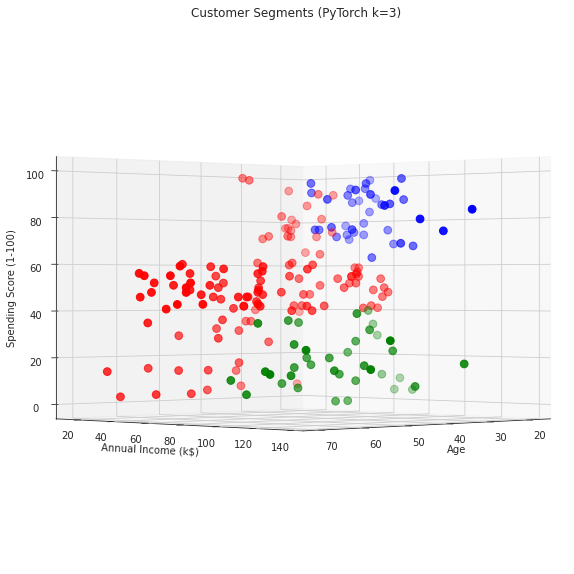

In [35]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df.Age[df.label == 0], df["Annual Income (k$)"][df.label == 0], df["Spending Score (1-100)"][df.label == 0], c='blue', s=60)
ax.scatter(df.Age[df.label == 1], df["Annual Income (k$)"][df.label == 1], df["Spending Score (1-100)"][df.label == 1], c='red', s=60)
ax.scatter(df.Age[df.label == 2], df["Annual Income (k$)"][df.label == 2], df["Spending Score (1-100)"][df.label == 2], c='green', s=60)
#ax.scatter(df.Age[df.label == 3], df["Annual Income (k$)"][df.label == 3], df["Spending Score (1-100)"][df.label == 3], c='orange', s=60)
#ax.scatter(df.Age[df.label == 4], df["Annual Income (k$)"][df.label == 4], df["Spending Score (1-100)"][df.label == 4], c='purple', s=60)
ax.view_init(0, 45)
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel('Spending Score (1-100)')
plt.title('Customer Segments (PyTorch k=3)')
plt.show()

## Take-Home Exercise

Find an interesting dataset for unsupervised learning, prepare the data, and run $k$-means on it.

In a brief report, describe your in-lab and take home experiments and their results.

### Answer:

- In this exercise I used the **Wine Dataset for Clustering** available at https://www.kaggle.com/datasets/harrywang/wine-dataset-for-clustering


In [36]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
# Loading Data
df = pd.read_csv("wine-clustering.csv")
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [38]:
print(f"Dataframe shape: {df.shape}\n")

Dataframe shape: (178, 13)



In [39]:
# Exploring the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [40]:
df.isnull().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

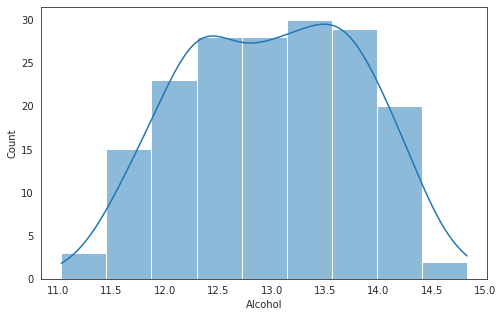

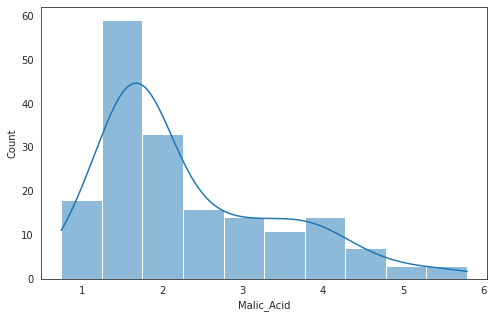

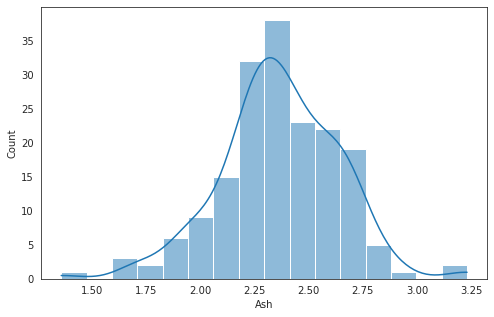

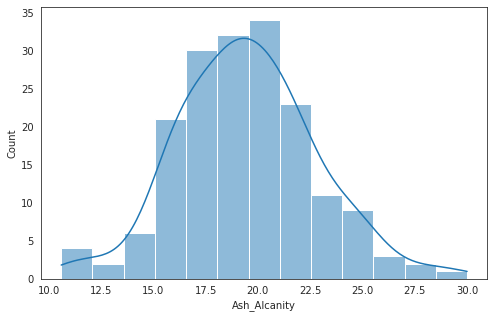

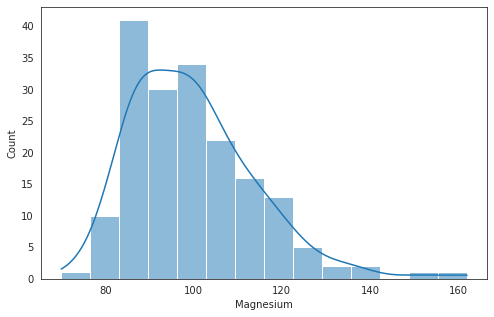

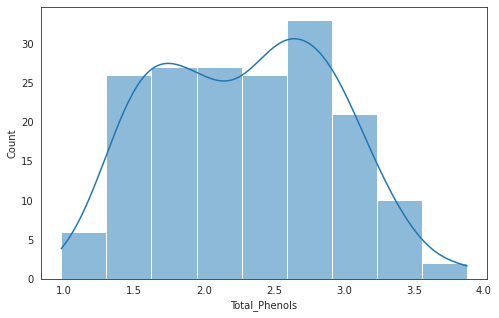

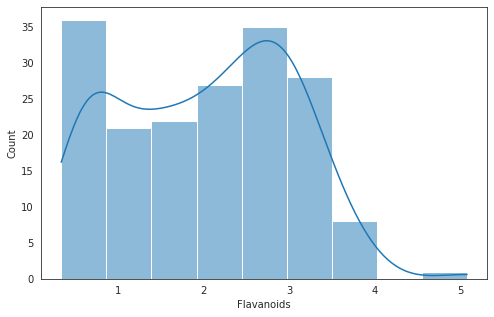

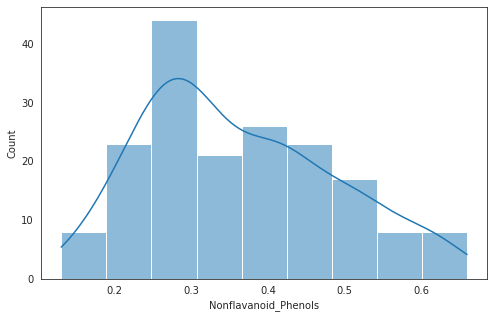

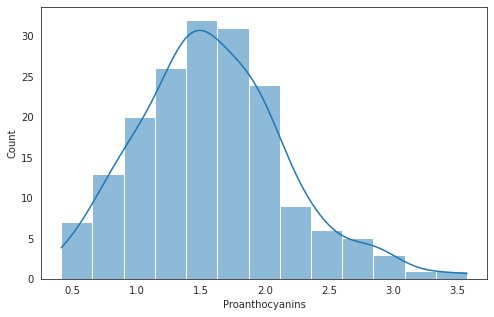

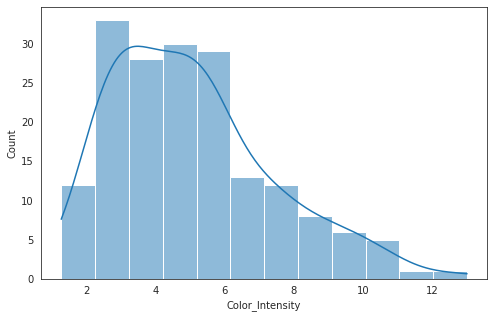

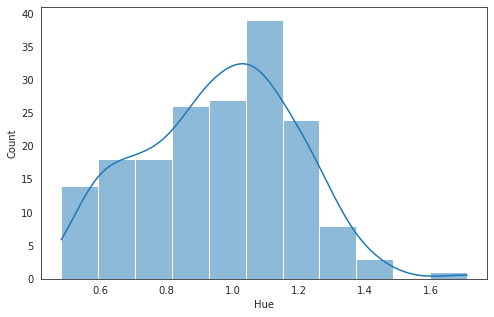

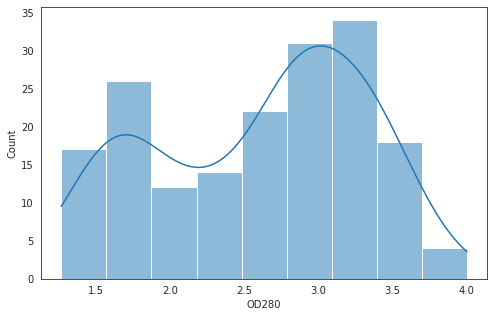

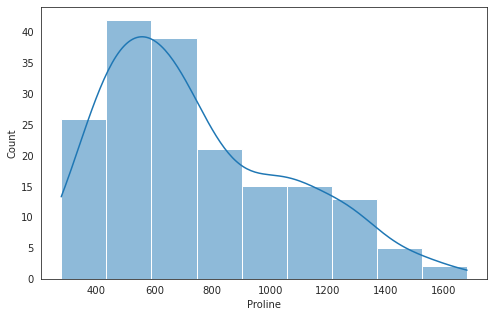

In [41]:
for col in df.columns:
    fig, axs = plt.subplots(figsize=(8,5))
    sns.histplot(data=df, x=col, kde=True, ax=axs)
    plt.show()

<AxesSubplot:>

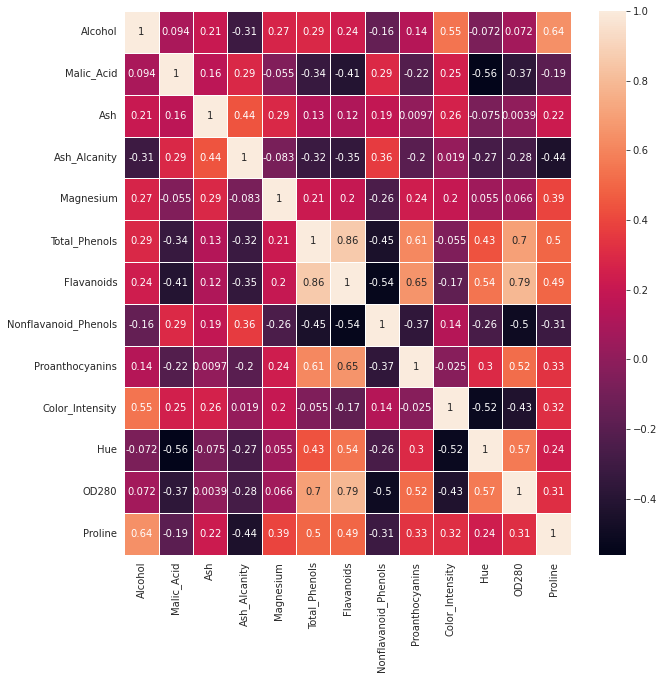

In [42]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(df.corr(), annot=True, linewidths=.5, ax=ax)

In [43]:
#Scaling and Standardizing

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
df_norm = sc.fit_transform(df)

In [44]:
type(df_norm)

numpy.ndarray

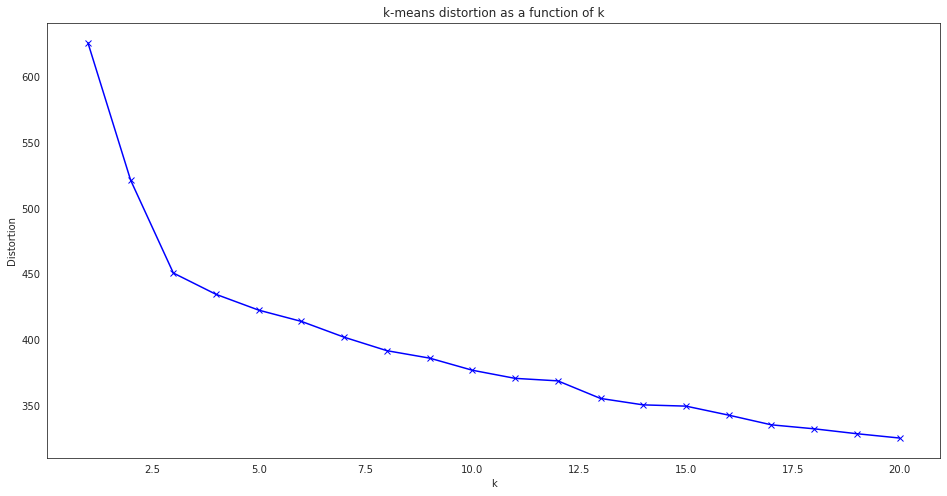

In [45]:
X = df_norm

# Intialize hyperparameters

max_k = 20
epsilon = 0.001
num_epochs = 10

# For each value of k, do num_epochs runs and record the minimum distortion for each k

distortions = np.zeros(max_k)
for k in range(1, max_k + 1):
    for i in range(num_epochs):
        means = init_kmeans(X, k)
        prev_distortion = 0
        while True:
            means, c, distortion = iterate_kmeans(X, means)
            if prev_distortion > 0 and prev_distortion - distortion < epsilon:
                break
            prev_distortion = distortion
        if i == 0:
            distortions[k-1] = distortion
        else:
            if distortion < distortions[k-1]:
                distortions[k-1] = distortion

# Plot distortion as function of k

plt.figure(figsize=(16,8))
plt.plot(range(1,max_k+1), distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('k-means distortion as a function of k')
plt.show()

In [50]:
# From the distortion plot it can be seen that the optimal number of clusters = 3

# Re-run k-means with k=3
k = 3
epsilon = 0.001
num_epochs = 100

# For each value of k, do num_epochs runs and record the minimum distortion and optimal centroids for each k
optimal_c = None
min_distortion = None

for i in range(num_epochs):
    means = init_kmeans(X, k)
    prev_distortion = 0
    distortion = 0
    while True:
        means, c, distortion = iterate_kmeans(X, means)
        if prev_distortion > 0 and prev_distortion - distortion < epsilon:
            break
        prev_distortion = distortion
    if i == 0:
        min_distortion = distortion
        optimal_c = c
    else:
        if distortion < min_distortion:
            min_distortion = distortion
            optimal_c = c

            # Set labels in dataset to cluster IDs according to k-means model.

df["label"] = c

In [51]:
# Analyzing each cluster

print("=====Cluster 1=====")
print(df[df.label == 0].mean())
print("\n")

print("=====Cluster 2=====")
print(df[df.label == 1].mean())
print("\n")

print("=====Cluster 3=====")
print(df[df.label == 2].mean())
print("\n")

=====Cluster 1=====
Alcohol                  13.134118
Malic_Acid                3.307255
Ash                       2.417647
Ash_Alcanity             21.241176
Magnesium                98.666667
Total_Phenols             1.683922
Flavanoids                0.818824
Nonflavanoid_Phenols      0.451961
Proanthocyanins           1.145882
Color_Intensity           7.234706
Hue                       0.691961
OD280                     1.696667
Proline                 619.058824
label                     0.000000
dtype: float64


=====Cluster 2=====
Alcohol                  12.250923
Malic_Acid                1.897385
Ash                       2.231231
Ash_Alcanity             20.063077
Magnesium                92.738462
Total_Phenols             2.247692
Flavanoids                2.050000
Nonflavanoid_Phenols      0.357692
Proanthocyanins           1.624154
Color_Intensity           2.973077
Hue                       1.062708
OD280                     2.803385
Proline                 510.16923

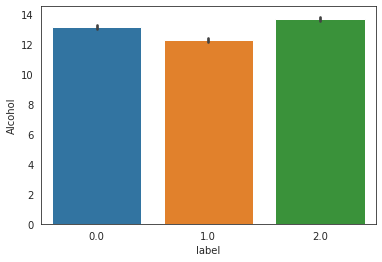

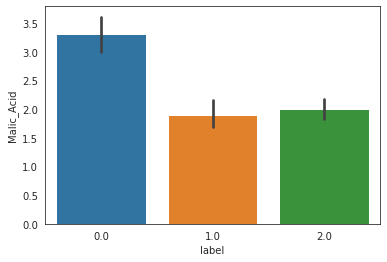

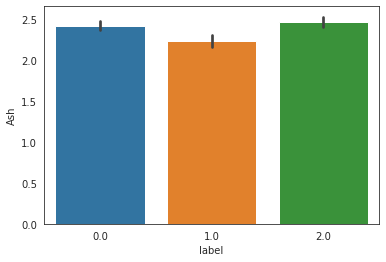

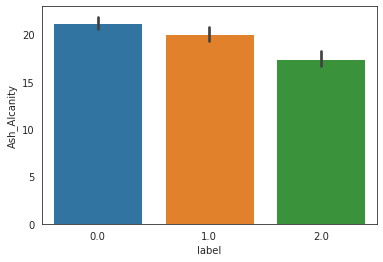

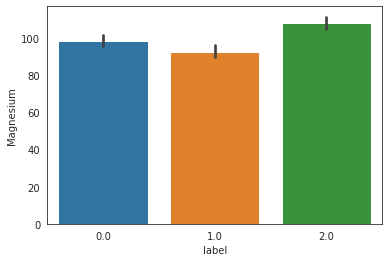

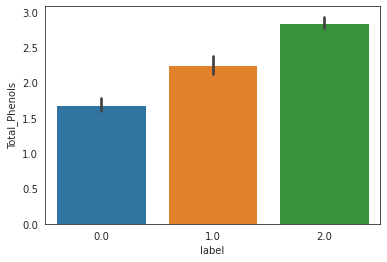

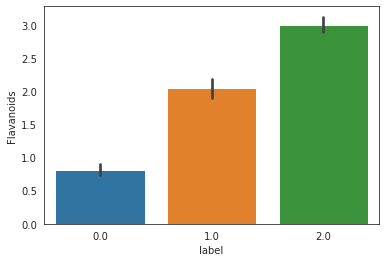

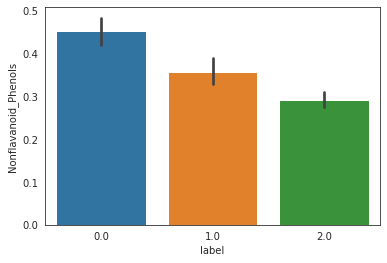

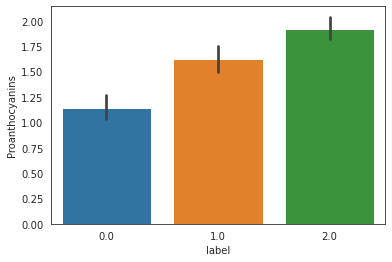

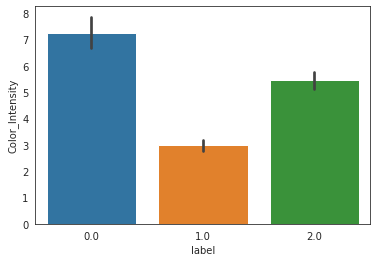

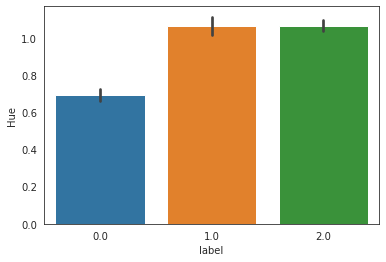

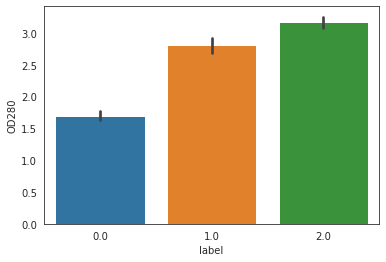

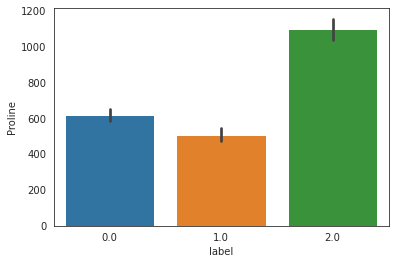

In [52]:
#Visualizing cluster properties.
for col in df.columns:
    if (col != 'label'):
        ax = sns.barplot(x=df['label'], y = df[col], estimator = np.mean)
        plt.show()

### Discussion:
- In this exercise I used the Wine Dataset for Clustering available at https://www.kaggle.com/datasets/harrywang/wine-dataset-for-clustering
- Steps followed in the exercise are:
    - **Loading the dataset**
    - **Exploring the dataset**
        - I performed a simple analysis of the dataset and found out that there are 13 features collected for 178 wine samples.
        - There are no missing values in any of the columns.
        - Also all the features are numerical.
        - Thus on this dataset ‘filling missing values’ and ‘converting categorical data to numerical values’ were not performed.
    - **Normalizing the data**
        - This was performed using `StandardScaler` in `sklearn.preprocessing` package.
    - **Identifying the "optimal" number of clusters**
        - With $k \in 1..20$,  I plot the distortion for each $k$, in order to find an optimal value for $k$ using the "elbow method."
        - For each $k$, I ran the K-Means algorithm 10 times and took the minimum distortion over those 10 runs
        - From the distortion plot, it can be seen for this dataset, the optimal number of clusters is 3
    - **Re-run k-means algorithm with k=3**
        - I re-ran the k-means algorithm with k=3 in order to find the centroids of the 3 clusters
        - Here, I ran the K-Means algorithm 100 times, each time starting from randomly selected cluster centroids.
        - From the 100 runs final centroids were selected based on the run that had the minimum distortion.
    - **Visualizing the clusters**
        - For each of the 3 clusters, I calculated the mean of each attribute in order to understand the properties of each cluster. 
        - Further, I visualize the properties of each cluster, using barplots by setting the estimator as np.mean.
        - From attribute means and barplots we can see that the mean value of features such as Malic_Acid, Total_Phenols, Flavanoids, OD280, and Proline are significantly different among the three clusters.

     

## Principle Component Analysis (PCA)

PCA or Principal Component Analysis is a data transformation tecnique for decreasing dimensions or features. This technique is useful for decreasing the complexity of a data set and for visualization.

In visualization, you want to see your data as lines, points, and a point cloud. It is easy to see if it is three dimensions or less. What about four dimesions? Oh no, we cannot show it clearly, so further
decreasing dimensionality might help.

In machine learning, having many features as possible might be useful for accurate modeling accurately. However, it is not every case that too much information could help such as unrelated features, features that are dependent 
on each other, or simply too many features (the curse of dimensionality).

## What happens after PCA?

Main concept of PCA is to find a new axis which can project a lot of data features as much as possible. The new axis is come from those features, so the new data still keep variance of data same as before decreasing dimensions.

![pca](PCA1.png)

Assume you have $n$ set of data with $d$ features which tell you from the smallest thing (such as atom). After using PCA, you will get the $n$ set of data with $k$ features which tell you in group of things.

![pca](PCA2.png)


### Mathematics of PCA

Assume $w$ is a unit vector along the axis
along which the data vary as much as possible, and mean vector $\mu=\frac{1}{m}\sum_{i=1}^mx^{(i)}$.

\begin{equation}
w_1 = \text{argmax}_w \frac{1}{m} \sum_{i=1}^m (w^T(x^{(i)}-\mu))^2 \\
= \text{argmax}_w \frac{1}{m} \sum_{i=1}^m (w^T(x^{(i)}-\mu)(x^{(i)}-\mu)^Tw) \\
= \text{argmax}_w w^T \color{red}{S}w
\end{equation}

In this case $S$ is the **covariance matrix** of the dataset $\mathtt{X}$.

### Step By Step Computation in PCA

The below steps need to be followed to perform dimensionality reduction using PCA:

1. Standardization of the data
2. Computing the covariance matrix
3. Calculating the eigenvectors and eigenvalues
4. Computing the principal components
5. Reducing the dimensions of the data set

#### Let's start

In [53]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from matplotlib import*
import matplotlib.pyplot as plt
from matplotlib.cm import register_cmap
from scipy import stats
from sklearn.decomposition import PCA
import seaborn

Load movie names and movie ratings

In [54]:
movies = pd.read_csv('movies.csv')
ratings = pd.read_csv('ratings.csv')
ratings.drop(['timestamp'], axis=1, inplace=True)

In [55]:
n_ratings = len(ratings)
n_movies = ratings['movieId'].nunique()
n_users = ratings['userId'].nunique()

print(f"Number of ratings: {n_ratings}")
print(f"Number of unique movieId's: {n_movies}")
print(f"Number of unique users: {n_users}")
print(f"Average number of ratings per user: {round(n_ratings/n_users, 2)}")
print(f"Average number of ratings per movie: {round(n_ratings/n_movies, 2)}")

Number of ratings: 100836
Number of unique movieId's: 9724
Number of unique users: 610
Average number of ratings per user: 165.3
Average number of ratings per movie: 10.37


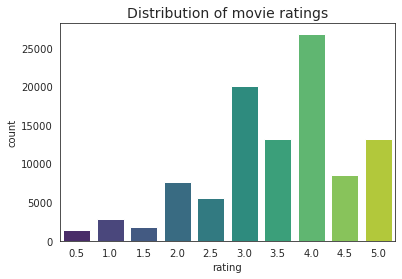

In [56]:
seaborn.countplot(x="rating", data=ratings, palette="viridis")
plt.title("Distribution of movie ratings", fontsize=14)
plt.show()

**Formatting the data**

In [57]:
def replace_name(x):
    return movies[movies['movieId']==x].title.values[0]

ratings.movieId = ratings.movieId.map(replace_name)
M = ratings.pivot_table(index=['userId'], columns=['movieId'], values='rating')
m = M.shape
df1 = M.replace(np.nan, 0, regex=True)

### 1) Standardization of the data

Standardization is the way to scale data into same scale. Because some information such as housing price (10,000-100,000 us) and area size (100-1000$m^2$) are not the same scale. It makes impact in one data, but another has lower impact.

Standardization can be calculated in many way. One of the equation is:

\begin{equation}
Z = \frac{x - \mu}{\sigma}
\end{equation}

In [58]:
X_std = StandardScaler().fit_transform(df1)

### 2) Compute the covariance matrix

Covariance matrix is a $p\times p$ matrix where $p$ represents the dimension of the dataset. Each entry in the matrix represents the covariance of the corresponding variables.

For 2-dimensional dataset with variable $a$ and $b$, the covariance matrix is $2\times 2$ matrix as:

\begin{equation}
S=\begin{bmatrix}
cov(a,a) & cov(a,b) \\ 
cov(b,a) & cov(b,b)
\end{bmatrix} = (x_t-\mu)(x_t-\mu)^T
\end{equation}

We can say that $cov(a,b)=cov(b,a)$.

In [59]:
mean_vec = np.mean(X_std, axis=0)
cov_mat = (X_std - mean_vec).T.dot((X_std - mean_vec)) / (X_std.shape[0]-1)
print('Covariance matrix n%s' %cov_mat)

Covariance matrix n[[ 1.00164204 -0.00164473 -0.00232791 ...  0.32582147 -0.00819887
  -0.00164473]
 [-0.00164473  1.00164204  0.70768614 ... -0.00360024 -0.00819887
  -0.00164473]
 [-0.00232791  0.70768614  1.00164204 ... -0.00509569 -0.01160448
  -0.00232791]
 ...
 [ 0.32582147 -0.00360024 -0.00509569 ...  1.00164204 -0.01794692
  -0.00360024]
 [-0.00819887 -0.00819887 -0.01160448 ... -0.01794692  1.00164204
  -0.00819887]
 [-0.00164473 -0.00164473 -0.00232791 ... -0.00360024 -0.00819887
   1.00164204]]


### 3) Calculating the Eigenvectors and Eigenvalues

Eigenvectors and eigenvalues are the mathematical constructs that must be computed from the covariance matrix in order to determine the principal components of the data set.

**What are Principal Components?**

Principal components are the new set of variables that are obtained from the initial set of variables. The principal components are computed in such a manner that newly obtained variables are highly significant and independent of each other. The principal components compress and possess most of the useful information that was scattered among the initial variables.

*If dataset of 5 dimensions, then 5 principal components are computed, such that, the first principal component stores the maximum possible information and the second one stores the remaining maximum info and so on, you get the idea.*

**Eigenvectors fall into this process**

Consider a 2-Dimensional data set, for which 2 eigenvectors (and their respective eigenvalues) are computed. The idea behind eigenvectors is to use the Covariance matrix to understand where in the data there is the most amount of variance. Since more variance in the data denotes more information about the data, eigenvectors are used to identify and compute Principal Components


Eigenvalues, on the other hand, simply denote the scalars of the respective eigenvectors. Therefore, eigenvectors and eigenvalues will compute the Principal Components of the data set.

In [60]:
#Calculating eigenvectors and eigenvalues on covariance matrix
cov_mat = np.cov(X_std.T)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)
print('Eigenvectors n%s' %eig_vecs)
print('nEigenvalues n%s' %eig_vals)

Eigenvectors n[[-6.17879786e-03+0.00000000e+00j  7.13214703e-03+0.00000000e+00j
   3.60191232e-03+0.00000000e+00j ... -1.94189493e-06-1.03241428e-06j
   1.04388520e-06+0.00000000e+00j  2.65748627e-07+0.00000000e+00j]
 [-1.37389338e-04+0.00000000e+00j -6.19748724e-05+0.00000000e+00j
  -2.68242736e-06+0.00000000e+00j ...  1.13844431e-07+6.08875633e-08j
  -6.17793382e-08+0.00000000e+00j -1.60428013e-08+0.00000000e+00j]
 [ 3.98116838e-05+0.00000000e+00j -1.70073920e-04+0.00000000e+00j
  -3.54723573e-05+0.00000000e+00j ...  2.49771272e-08+8.35694722e-09j
  -8.67269483e-09+0.00000000e+00j  2.99758954e-09+0.00000000e+00j]
 ...
 [-5.71402600e-03+0.00000000e+00j  4.61929109e-03+0.00000000e+00j
   3.30601109e-03+0.00000000e+00j ...  1.58550153e-06+1.39702611e-06j
  -1.40678777e-06+0.00000000e+00j -8.62720779e-07+0.00000000e+00j]
 [-1.45210348e-02+0.00000000e+00j -3.31390410e-04+0.00000000e+00j
   3.25182697e-03+0.00000000e+00j ...  4.87727952e-07-2.00681796e-07j
   1.16179442e-07+0.00000000e+00j

**Compute the feature vector**

Rearrange the eigenvalues in descending order. This represents the significance of the principal components in descending order:

In [61]:
# Visually confirm that the list is correctly sorted by decreasing eigenvalues
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:
694.6347372544976
487.22068862940506
438.98894895557356
379.0404527253012
324.3162458652451
259.1091962886288
251.67075199496387
226.08065316490544
206.77043202389743
186.08012008011866
180.35681567362872
150.5768982687858
140.5335104255665
135.00425543775688
116.7593112135558
111.22844429826303
105.98588556400014
101.52061108863404
92.38143975955762
87.20146448316846
83.94704525828433
76.51329078142044
73.12943769509842
71.33450019035205
68.66916875072943
68.11563805135063
66.09778445224089
64.79772886519716
64.76738664207923
60.57541016802223
60.095701576953694
58.44406220313049
57.143880762362926
55.70369700851537
55.153276987647196
54.42361668166476
53.623116971407306
49.754253302721274
49.22568958301029
47.7922088933627
46.743581142451156
46.44527988080509
45.339551347469616
45.09994762096548
44.61986596644062
44.256502467638015
43.961387761591546
42.67209649629769
41.73888704520197
41.05033324888548
41.22691039968716
40.0211441041271
39.1981438227

1.583196436926411e-14
1.6620301280632877e-14
1.6620301280632877e-14
1.7087169927768315e-14
1.7087169927768315e-14
1.5433512862413964e-14
1.5433512862413964e-14
1.6732106750545756e-14
1.6732106750545756e-14
1.7235595483824592e-14
1.7235595483824592e-14
1.6725360173392906e-14
1.6725360173392906e-14
1.5676491116495296e-14
1.5676491116495296e-14
1.642849059151864e-14
1.642849059151864e-14
1.675670647113423e-14
1.675670647113423e-14
1.7121754438926282e-14
1.7121754438926282e-14
1.725807716134215e-14
1.596496733317857e-14
1.596496733317857e-14
1.6810258868134703e-14
1.6810258868134703e-14
1.6916909702884356e-14
1.612907767386704e-14
1.612907767386704e-14
1.6895360412653974e-14
1.6895360412653974e-14
1.6593140357902477e-14
1.6593140357902477e-14
1.6317957140781788e-14
1.6317957140781788e-14
1.682695978919006e-14
1.621776415539704e-14
1.6542410131828846e-14
1.6542410131828846e-14
1.634946139592518e-14
1.634946139592518e-14
1.6500927783491993e-14
8.58857001284774e-15
8.58857001284774e-15
1.0446

1.8382095113469545e-29
1.8382095113469545e-29
1.7706402532457363e-29
1.7706402532457363e-29
1.7882142306991965e-29
1.7882142306991965e-29
1.824996361531778e-29
1.824996361531778e-29
1.7675566187703523e-29
1.7675566187703523e-29
1.7360828918754923e-29
1.7360828918754923e-29
1.73990019157676e-29
1.7528803076107118e-29
1.7528803076107118e-29
1.7560013722973502e-29
1.7560013722973502e-29
1.770041032766571e-29
1.770041032766571e-29
1.7503176026356053e-29
1.7503176026356053e-29
1.7307242057985675e-29
1.7307242057985675e-29
1.7357643424040497e-29
1.7357643424040497e-29
1.7378365931242964e-29
1.7378365931242964e-29
1.7349566822621086e-29
1.7349566822621086e-29
1.7259998770066065e-29
1.7259998770066065e-29
1.6884521106540936e-29
1.6884521106540936e-29
1.6980945181952822e-29
1.6980945181952822e-29
1.677985612722443e-29
1.677985612722443e-29
1.6840401501059134e-29
1.6840401501059134e-29
1.663957149310326e-29
1.663957149310326e-29
1.6434361529651474e-29
1.6434361529651474e-29
1.6360283533777197e-2

### 4) Computing the Principal Components
Once we have computed the Eigenvectors and eigenvalues, all we have to do is order them in the descending order, where the eigenvector with the highest eigenvalue is the most significant and thus forms the first principal component. The principal components of lesser significances can thus be removed in order to reduce the dimensions of the data.

The final step in computing the Principal Components is to form a matrix known as the feature matrix that contains all the significant data variables that possess maximum information about the data.

In [62]:
pca = PCA(n_components=2)
pca.fit_transform(df1)
print(pca.explained_variance_ratio_)

[0.13502694 0.04383615]


### 5) Reducing the dimensions of the data set

To perform PCA is to re-arrange the original data with the final principal components which represent the maximum and the most significant information of the data set. In order to replace the original data axis with the newly formed Principal Components, you simply multiply the transpose of the original data set by the transpose of the obtained feature vector.

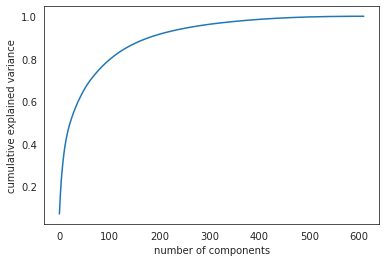

In [63]:
pca = PCA().fit(X_std)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

## Take Home Exercise

Use [Siricon wafer thickness](https://openmv.net/info/silicon-wafer-thickness) dataset which contains data
- $N=184$
- $k=9$

1. Build a PCA model on all the data.
2. Plot the scores for the first two components. What do you notice? Investigate the outliers, and the raw data for each of these unusual observations. What do you conclude about those observations?

### Answer:

In doing this exercise I used the explanation provided in YouTube video 'StatQuest: PCA in Python' (https://www.youtube.com/watch?v=Lsue2gEM9D0)

In [64]:
# Loading Data
df = pd.read_csv("silicon-wafer-thickness.csv")
df.head()

,G1,G2,G3,G4,G5,G6,G7,G8,G9
0,0.175,0.188,-0.159,0.095,0.374,-0.238,-0.800,0.158,-0.211
1,0.102,0.075,0.141,0.180,0.138,-0.057,-0.075,0.072,0.072
2,0.607,0.711,0.879,0.765,0.592,0.187,0.431,0.345,0.187
3,0.774,0.823,0.619,0.370,0.725,0.439,-0.025,-0.259,0.496
4,0.504,0.644,0.845,0.681,0.502,0.151,0.404,0.296,0.260


In [65]:
df.shape

(184, 9)

In [66]:
# Exploring the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184 entries, 0 to 183
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   G1      184 non-null    float64
 1   G2      184 non-null    float64
 2   G3      184 non-null    float64
 3   G4      184 non-null    float64
 4   G5      184 non-null    float64
 5   G6      184 non-null    float64
 6   G7      184 non-null    float64
 7   G8      184 non-null    float64
 8   G9      184 non-null    float64
dtypes: float64(9)
memory usage: 13.1 KB


In [67]:
df.isnull().sum()

G1    0
G2    0
G3    0
G4    0
G5    0
G6    0
G7    0
G8    0
G9    0
dtype: int64

In [68]:
# Standardization of the data
sc = StandardScaler()
df_norm = sc.fit_transform(df)

In [69]:
pca = PCA() 
pca.fit(df_norm) 

# Generates coordinates for PCA graph based on the loading scores and standardized data
pca_data = pca.transform(df_norm) 

In [70]:
pca.explained_variance_ratio_

array([0.90837038, 0.02822623, 0.02240953, 0.01960468, 0.00768546,
       0.00624863, 0.0033764 , 0.0029256 , 0.00115308])

In [71]:
0.90837038 + 0.02822623

0.93659661

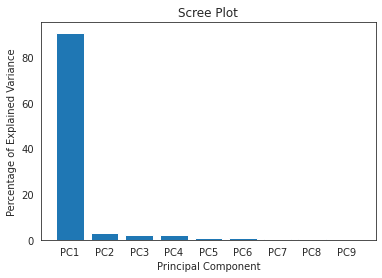

In [72]:
# Scree plot
per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]
 
plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()

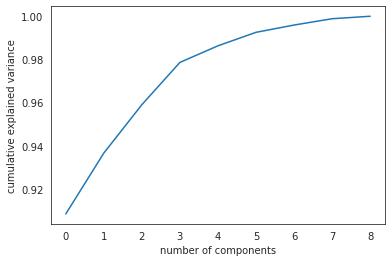

In [73]:
# Cumulative explained variance plot
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

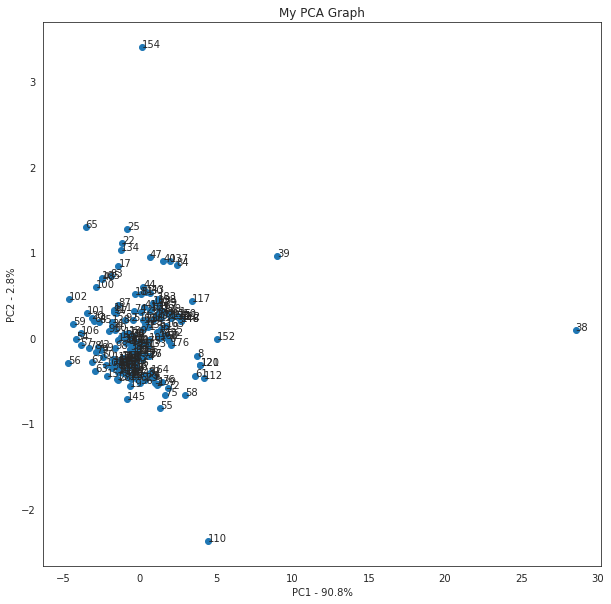

In [74]:
# Ploting the scores for the first two components
idx = np.arange(0,184)
pca_df = pd.DataFrame(pca_data, index=idx, columns=labels)

plt.figure(figsize=(10,10))
plt.scatter(pca_df.PC1, pca_df.PC2)
plt.title('My PCA Graph')
plt.xlabel('PC1 - {0}%'.format(per_var[0]))
plt.ylabel('PC2 - {0}%'.format(per_var[1]))
 
for sample in pca_df.index:
    plt.annotate(sample, (pca_df.PC1.loc[sample], pca_df.PC2.loc[sample]))
 
plt.show()

In [75]:
#Outlier data samples

idx_outliers = [38,110,154]

df.iloc[idx_outliers]

,G1,G2,G3,G4,G5,G6,G7,G8,G9
38,7.197,8.060,7.223,7.589,7.258,8.310,7.835,8.931,7.824
110,2.183,1.969,2.017,1.957,1.899,0.518,0.518,0.426,0.637
154,-0.107,-0.093,0.065,0.114,-0.072,4.029,-0.055,-0.062,-0.454


In [77]:
df.describe()

,G1,G2,G3,G4,G5,G6,G7,G8,G9
count,184.000000,184.000000,184.000000,184.000000,184.00000,184.000000,184.000000,184.000000,184.000000
mean,0.249245,0.293576,0.351696,0.316196,0.30250,0.143277,0.156185,0.304603,0.131821
std,0.720936,0.780485,0.727749,0.742577,0.73937,0.923092,0.822092,0.901041,0.819553
min,-1.171000,-1.186000,-0.975000,-1.186000,-1.09500,-1.252000,-1.470000,-1.283000,-1.416000
25%,-0.053000,-0.062000,0.047750,0.025000,-0.07100,-0.383500,-0.260250,-0.144250,-0.367000
50%,0.181000,0.235500,0.284000,0.288000,0.26600,0.068000,-0.015500,0.272000,0.009000
75%,0.491250,0.548000,0.588500,0.549750,0.54075,0.484000,0.501500,0.728000,0.496000
max,7.197000,8.060000,7.223000,7.589000,7.25800,8.310000,7.835000,8.931000,7.824000


In [78]:
# Determine which features had the biggest influence on PC1 in clustering along x-axis

loading_scores = pd.Series(pca.components_[0], index=df.columns)
sorted_loading_scores = loading_scores.abs().sort_values(ascending=False)
pc1_top_features = sorted_loading_scores.index.values
print(loading_scores[pc1_top_features])

G1    0.342935
G2    0.342058
G4    0.339984
G3    0.339762
G5    0.337656
G9    0.335262
G7    0.329004
G8    0.318544
G6    0.313429
dtype: float64


In [79]:
# Determine which features had the biggest influence on PC2 in clustering along y-axis

loading_scores = pd.Series(pca.components_[1], index=df.columns)
sorted_loading_scores = loading_scores.abs().sort_values(ascending=False)
pc2_top_features = sorted_loading_scores.index.values
print(loading_scores[pc2_top_features])

G6    0.736105
G3   -0.316014
G7    0.287079
G1   -0.279306
G5   -0.256679
G4   -0.227569
G2   -0.175521
G8    0.170820
G9    0.142127
dtype: float64


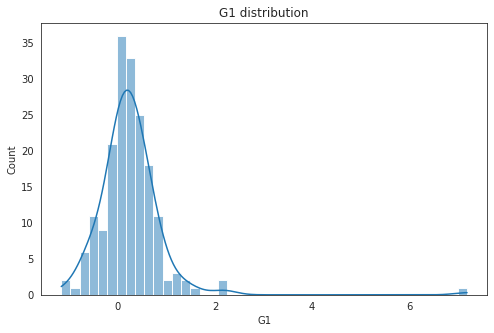

In [80]:
fig, axs = plt.subplots(figsize=(8,5))
sns.histplot(data=df, x=df['G1'], kde=True, ax=axs)
plt.title('G1 distribution')
plt.show()

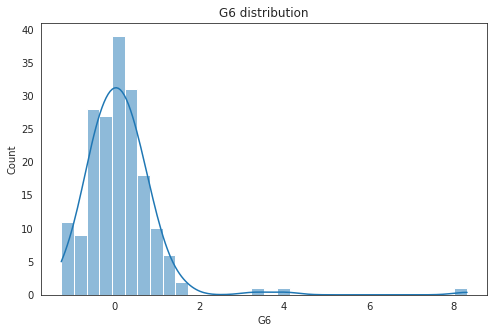

In [81]:
fig, axs = plt.subplots(figsize=(8,5))
sns.histplot(data=df, x=df['G6'], kde=True, ax=axs)
plt.title('G6 distribution')
plt.show()

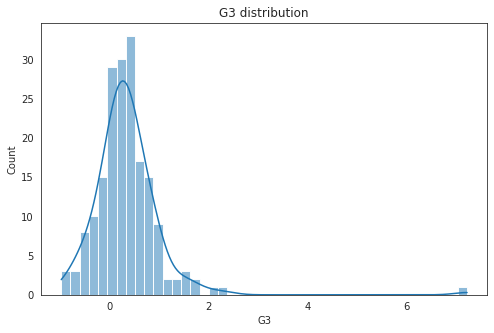

In [82]:
fig, axs = plt.subplots(figsize=(8,5))
sns.histplot(data=df, x=df['G3'], kde=True, ax=axs)
plt.title('G3 distribution')
plt.show()

### Discussion

- In this exercise, I built a PCA model on all the data
- Analysing explained variance ratio
    - PC1 explained variance ratio = 0.90837038
    - PC2 explained variance ratio = 0.02822623
    - Thus we can see that approximately 93.66% of the variance is explained by the first 2 components
    - By plotting the scores for the first two components, we can see that majority of the samples in the dataset form a single cluster.
    - The outliers are the samples at indices 38,110 and 154
        - Sample 38 is far away from the normal cluster along the x-axis (PC1).
            - The feature that has the biggest influence on PC1 is G1, and when we look at the distribution plot of G1, we can see that there is a sample that is close to the maximum value recorded for G1, this corresponds to sample 38.
        - Sample 154 is far away from the normal cluster along the y-axis (PC2).
            - The feature that has the biggest influence on PC2 is G6, and when we look at the distribution plot of G6, we can see that there are 3 samples that are significantly away from the rest of the samples, and one of these samples is 154.
        - Sample 110 is far away from the normal cluster along the y-axis (PC2).
            - The feature that has the 2nd biggest influence on PC2 is G3, and when we look at the distribution plot of G3, we can see that there are 3 samples that are significantly away from the rest of the samples, and one of these samples is 110.
        - Therefore we can conclude that these outliers corresponds to the outlier samples we observer in distribution plots of the features.

        
    